## Name : <span style='color:#324587'>SK ASIF ALI</span>
## Role :  <span style='color:#659478'> Intern At The Sparks Foundation </span>
## Function : <span style='color:#328578'>  Data Science and Bussiness Analytics (January 2021)

## <span style='color:#C34A36'> Problem Statement </span>   : #Task 6 Create the Decision Tree classifier and visualize it graphically.

<img src="6.png" height="100" />


## <span style='color:##189AB4'> Importing the Necessary Libraries

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from io import StringIO   
from IPython.display import Image 
%matplotlib inline
sns.set()
plt.rcParams['text.color']='#0000'

## <span style='color:#845EC2'>Importing the Data From CSV File </span>

In [125]:
df=pd.read_csv('Iris.csv',index_col='Id')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


## <span style='color:#2D8BA8'> Statistical Description of the dataframe : - </span>


In [126]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## <span style='color:#BE93FD'>Pairwise Relationship between Dataset

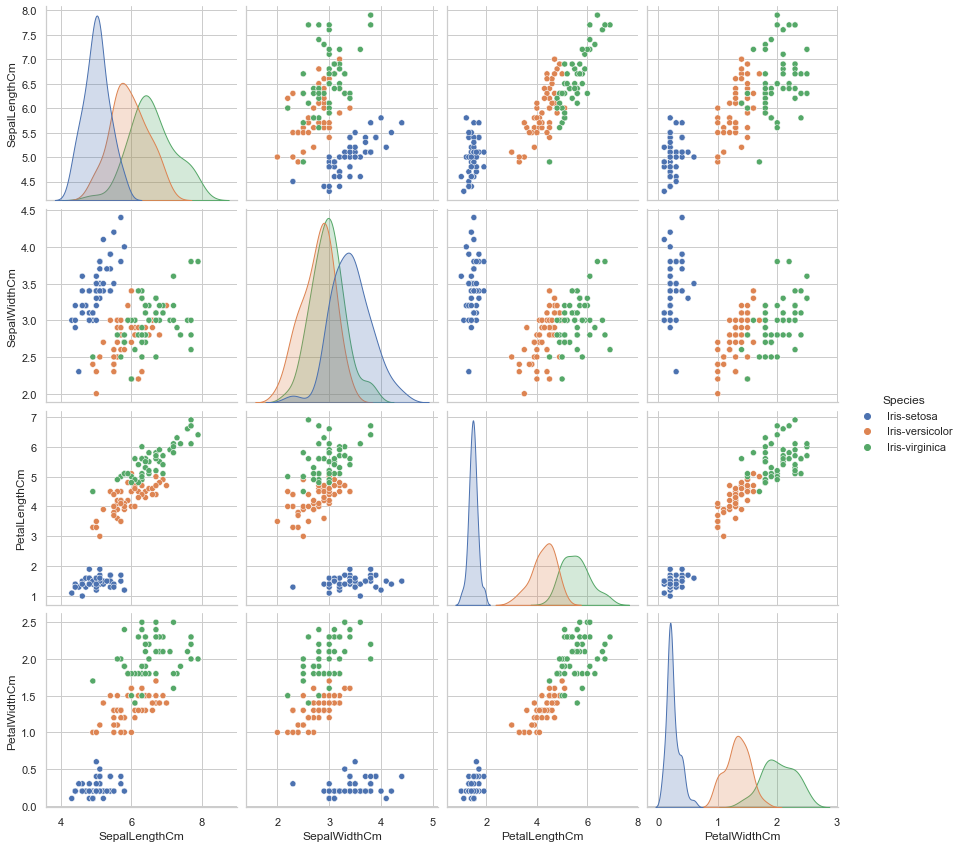

In [127]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Species",height=3);
plt.show()

## <span style='color:#009EFA'> Dividing the Dataset Into Input and Target

In [128]:
input=df.iloc[:,:4].values
target=df.Species.values

## <span style='color:#128496'> We need to split the dataset into train and test into a ratio ---  
 ## <span style='color:#128496'>   Training : 70% and Testing : 30%

In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input,target,test_size=0.3,random_state=100)


## <span style='color:#ff2245'> Feature Scaling For Better Performance </span>

In [130]:
from sklearn.preprocessing import StandardScaler  
s = StandardScaler()  
s.fit(x_train)
 
x_train = s.transform(x_train)  
x_test = s.transform(x_test)  

## <span style='color:#236452'> Import of DecisionTreeClassifier from Sklearn


In [131]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

## <span style='color:#231485'> Train the Model with Train Data


In [132]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

## <span style='color:#124365'> Accuracy of the model : </span>

In [133]:
model.score(x_test,y_test)

0.9555555555555556

## <span style='color:#327568'> Simple Test Case Prediction </span>

## <span style='color:#ff2244'>SepalLengthCm-5.9 SepalWidthCm-3.0 PetalLengthCm-5.1	PetalWidthCm-1.8

In [134]:
model.predict([[5.9,3.0,5.1,1.8]])

array(['Iris-virginica'], dtype=object)

##  <span style='color:#aa2645'>Viewing the Unique Species


In [135]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## <span style='color:#652476'> Tree Visualization with Plot Tree

[Text(334.8, 733.86, 'PetalLengthCm <= -0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 39, 32]\nclass = Iris-versicolor'),
 Text(251.10000000000002, 570.78, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(418.5, 570.78, 'PetalWidthCm <= 0.641\ngini = 0.495\nsamples = 71\nvalue = [0, 39, 32]\nclass = Iris-versicolor'),
 Text(167.4, 407.70000000000005, 'PetalLengthCm <= 0.74\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]\nclass = Iris-versicolor'),
 Text(83.7, 244.62, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = Iris-versicolor'),
 Text(251.10000000000002, 244.62, 'SepalLengthCm <= 0.311\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(167.4, 81.54000000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(334.8, 81.54000000000008, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(669.6, 407.70000000000005, 'PetalLengthCm <= 0.652\ngini = 0.064\nsamples = 30\nv

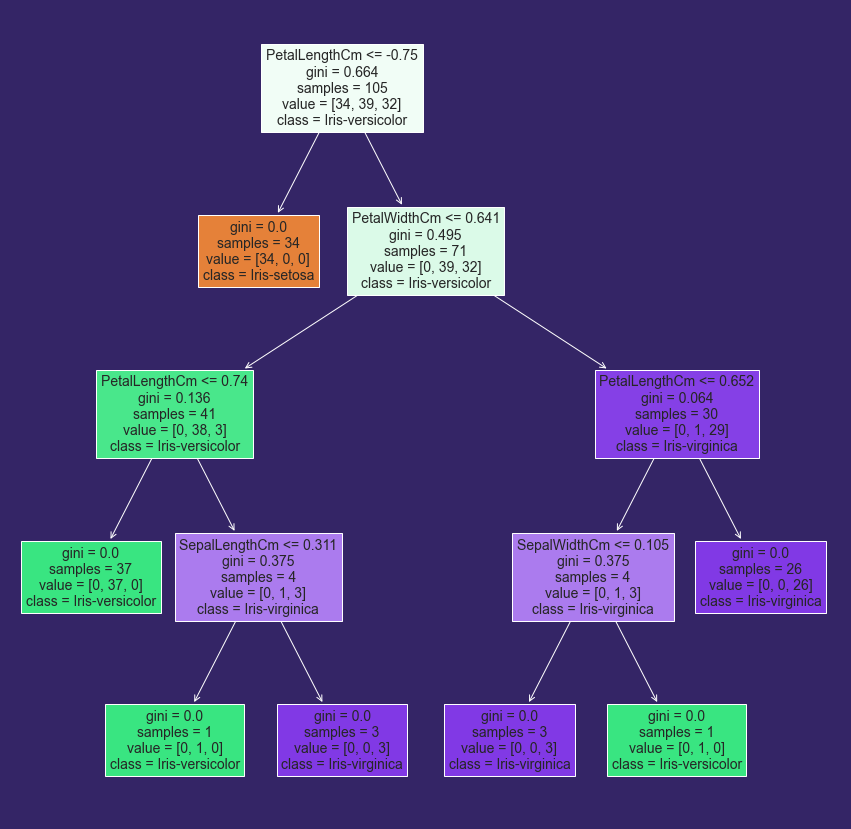

In [136]:
from sklearn.tree import plot_tree
f=df.drop(['Species'],axis=1).columns
c=df['Species'].unique()
plt.figure(figsize=(15,15),facecolor='#342566',edgecolor='#ff2222')
tree.plot_tree(model,feature_names=f,class_names=c,filled=True)


## <span style='color:#524685'> Tree Visualization with GraphViz 

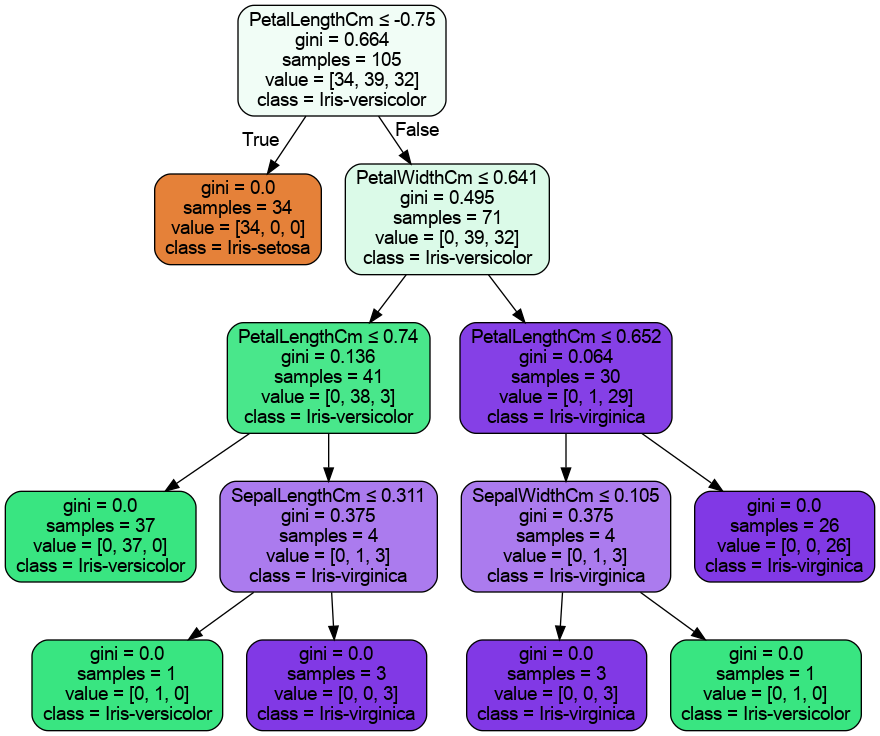

In [137]:
from sklearn import tree
dot_data = StringIO()  
tree.export_graphviz(model, out_file=dot_data,  
                     feature_names=f,  
                     class_names=c,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# <span style='color:#ff5599'> Thank You</span> <span style='color:#55ff99'> End Task</span>